<a href="https://colab.research.google.com/github/ngotancuong/datamining/blob/main/MSE_Ngo_Tan_Cuong_DataMining_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pham Quang Viet - MSE23069 - viet22mse23069@fsb.edu.vn

**1. Prepare**

In [ ]:
#Install kaggle
!pip install kaggle

In [ ]:
#Set my Kaggle API environment
import os
os.environ['KAGGLE_USERNAME'] = 'quangviet'
os.environ['KAGGLE_KEY'] = '14b8138f3158faafdd80fcb13c92784c'

In [ ]:
# Download and unzip the dataset
!kaggle datasets download -d laavanya/stress-level-detection
!unzip -o stress-level-detection.zip

stress-level-detection.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  stress-level-detection.zip
  inflating: Mohanty_IEEE-TCE_2019-Nov_Stress-Lysis.pdf  
  inflating: Stress-Lysis.csv        
  inflating: readme.docx             


In [ ]:
# Import pandas and read the dataset
import pandas as pd
df = pd.read_csv('Stress-Lysis.csv')

In [ ]:
# Print out some overview information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step count    2001 non-null   int64  
 3   Stress Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [ ]:
df.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Humidity,2001.0,20.000000,5.777833,10.0,15.0,20.0,25.0,30.0
Temperature,2001.0,89.000000,5.777833,79.0,84.0,89.0,94.0,99.0
Step count,2001.0,100.141429,58.182948,0.0,50.0,101.0,150.0,200.0
Stress Level,2001.0,1.104448,0.771094,0.0,0.0,1.0,2.0,2.0


In [ ]:
#Check missing values
df.isna().sum()

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64

**2. EDA**

In [ ]:
#Visualize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

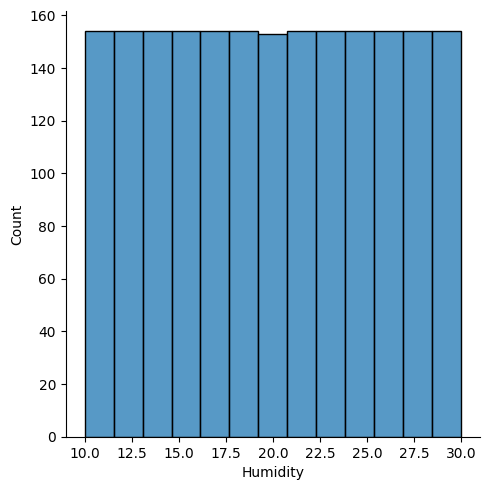

In [ ]:
sns.displot(df['Humidity']) #Humidity data is almost evenly distributed

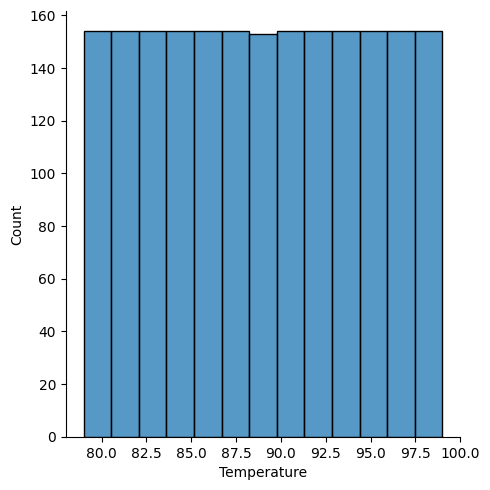

In [ ]:
sns.displot(df['Temperature'])

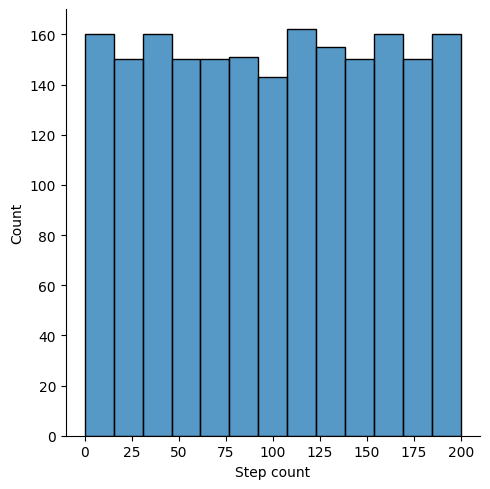

In [ ]:
sns.displot(df['Step count'])

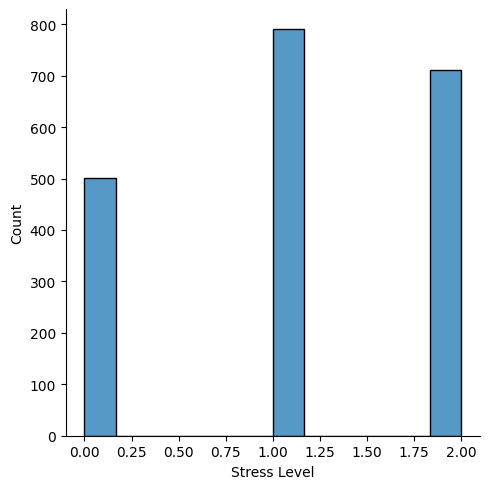

In [ ]:
sns.displot(df["Stress Level"])

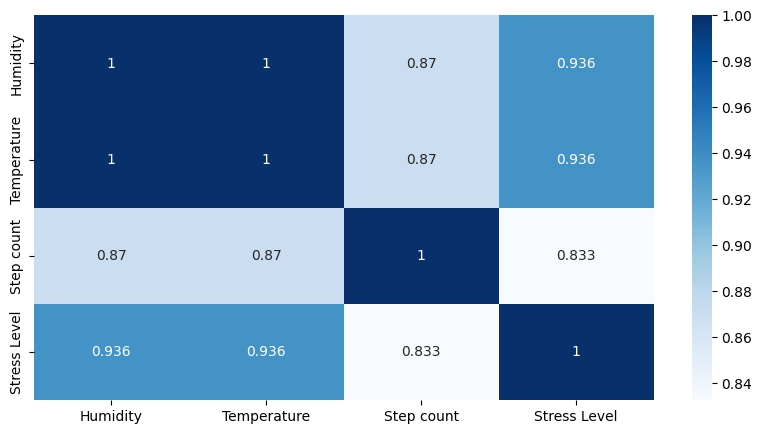

In [ ]:
# Show correlations between variables
plt.figure(figsize=(10,5))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.3g')

EDA conclusion:
- Dataset is highly balanced
- Humidity, temperature and step count all have high correlations to stress level, with the former 2 have slighly higher correalations
- No missing values
- Probably logistic regression is enough

**3. Build model**

3.1 Logistic regression

In [ ]:
# Logistic regression
from sklearn.model_selection import train_test_split
x=df.drop(['Stress Level'],axis=1)
y=df['Stress Level']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, stratify=y, random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C= 1.0, penalty='l2',random_state=0)
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pred = clf.predict(x_test)
cm = confusion_matrix(y_test, pred)
print(cm)
print(accuracy_score(y_test,pred))

[[101   0   0]
 [  0 158   0]
 [  0   1 141]]
0.9975062344139651


3.2 Decision tree

In [ ]:
from sklearn import tree
model_dt = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
d_x_train, d_x_test, d_y_train, d_y_test = train_test_split(x,y,test_size=0.2, stratify=y, random_state=0)

# Set the test data for learning
model_dt.fit(d_x_train, d_y_train)

# Conduct inference
test_dt = model_dt.predict(d_x_test)

# Calculate the accuracy
score_dt = model_dt.score(d_x_test, d_y_test)
print(f'Accuracy is {score_dt * 100}%.')

Accuracy is 100.0%.


[Text(0.6, 0.8333333333333334, 'Temperature <= 91.905\ngini = 0.655\nsamples = 1600\nvalue = [400, 632, 568]\nclass = y[1]'),
 Text(0.4, 0.5, 'Temperature <= 84.005\ngini = 0.475\nsamples = 1032\nvalue = [400, 632, 0]\nclass = y[1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 400\nvalue = [400, 0, 0]\nclass = y[0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 632\nvalue = [0, 632, 0]\nclass = y[1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 568\nvalue = [0, 0, 568]\nclass = y[2]')]

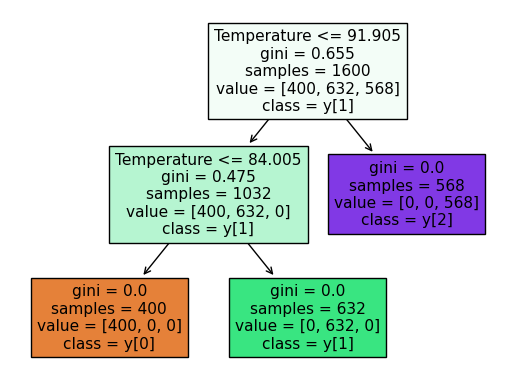

In [ ]:
from sklearn.tree import plot_tree
plot_tree(model_dt, feature_names=df[df.columns[df.columns != 'Stress_Level']].columns, class_names=True, filled=True)

This decision tree is very easy to explain:
- If temperature > 91.905: Subject has high stress level
- If temperature <= 84.005: Subject has low stress level
- Other: Subject has normal stress level

3.3 Random forest

In [ ]:
# Build a leaening model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=3, random_state=42)

# Set the test data for learning
model_rf.fit(x_train, y_train)

# Conduct inference
test = model_rf.predict(x_test)

# Calculate the accuracy
score_rfc = accuracy_score(y_test, test)
print(f'Accuracy is {score_rfc * 100}%.')

Accuracy is 100.0%.


3.4 Neural Net

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train,y_train)

predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

In [ ]:
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

[[396   4   0]
 [  0 632   0]
 [  0   1 567]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       400
           1       0.99      1.00      1.00       632
           2       1.00      1.00      1.00       568

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



Conclusion:
- Logistic Regression: 0.9975
- Decision Tree: 1.0
- Random Forest: 1.0
- Neural Network: 1.0

**4. Port to app**

Obviously the decision tree is trivial to implement, so I ported it to a web server

The web app can be accessed here: https://mse.gem.io.vn

Technology used: React app deployed to CloudFlare